___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 12

**Preparo Prévio:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 203).

**Hoje:**
1. Descrever as propriedades do modelo normal quanto aos resultados teóricos.
2. Utilizar modelos normais para resolução de problemas seja com ou sem uso do Python.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Padaria </font>

Uma empresa deve decidir onde construir uma padaria: <font color='green'>Bairro A </font> ou <font color='orange'> Bairro B </font>. 

Como ambos os bairros possuem densidades populacionais próximas, os investidores visam atingir um público alvo de maior renda familiar. 
Assim, quanto maior o número de famílias com rendas familiares mais altas, maior será a chance do empreendimento ser bem sucedido. 

Considerando que a decisão final seja baseada em informações sobre a renda familiar dos moradores desses dois bairros, responda:

1. Calcule algumas medidas resumo úteis para entender o comportamento dessa variável em ambos os bairros. Analise.
2. Construa o histograma dos dados e compare as distribuições de renda familiar (em mil reais) dos dois bairros. Qual é o melhor bairro para construir o padaria? Justifique.
3. Assuma que $X$: renda familiar de um determinado bairro tenha $\mu$ estimada pela média amostral ($\bar{x}$) e tenha $\sigma^2$ estimada pela variância amostral, ambas de um mesmo bairro em questão. Verifique, visualmente/graficamente, se a distribuição normal é adequada para estimar a renda familiar de cada bairro. Para isso, interprete os seguintes gráficos:
      1. Construa o histograma dos dados junto com a fdp da distribuição normal.
      2. Construa o QQ-Plot (quantil amostral vs quantil teórico). Dica: veja Exemplo 6.8 do Magalhães e Lima (7ª. edição) de como obter as frequências relativas acumuladas a partir de uma amostra de tamanho n=500 (de cada bairro). Os quantis teóricos da distribuição normal podem ser obtidos pelo comando `stats.norm.ppf(p, loc=mu, scale=sigma)`, sendo `p` a frequencia relativa acumulada  obtida anteriormente.
      3. Construa um gráfico dos valores observados vs frequência relativa acumulada (a partir dos dados) e vs função de distribuição acumulada.
   
4. Independente da sua resposta do item anterior, assuma que $X$: renda familiar de um determinado bairro segue uma distribuição normal considerando as estimativas amostrais como valores dos parâmetros de cada bairro. Nesse caso, para cada bairro, calcule:
      1. probabilidade de uma família possuir renda familiar maior do que 17 mil reais.
      2. sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, qual a probabilidade dessa possuir renda inferior a 16 mil reais.
      3. qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 



In [42]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange
import pylab

print('Esperamos trabalhar no diretório')
print(os.getcwd())

pad = pd.read_excel('Padaria.xlsx')

Esperamos trabalhar no diretório
C:\Users\lucas\Documents\GitHub\CDEng\aula12


In [4]:
pad.head()

,A,B
0,15.12024,15.09858
1,15.84624,16.31988
2,15.23992,13.07412
3,15.32792,16.06320
4,14.54736,16.13565


Describe BAIRRO A: 
count    500.000000
mean      15.321676
std        0.592599
min       13.450880
25%       14.919380
50%       15.335840
75%       15.702140
max       17.151280
Name: A, dtype: float64

Describe BAIRRO B: 
count    500.000000
mean      14.221997
std        1.840182
min        9.704160
25%       12.843832
50%       14.348205
75%       15.770295
max       18.911520
Name: B, dtype: float64


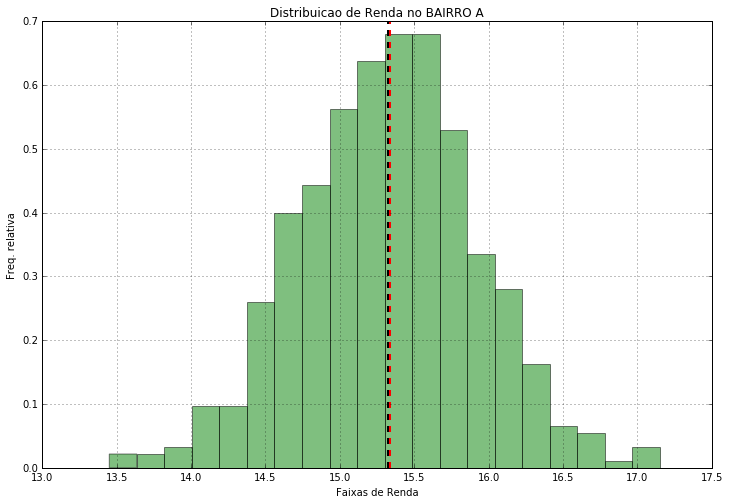

Mediana: 15.34
Media: 15.32


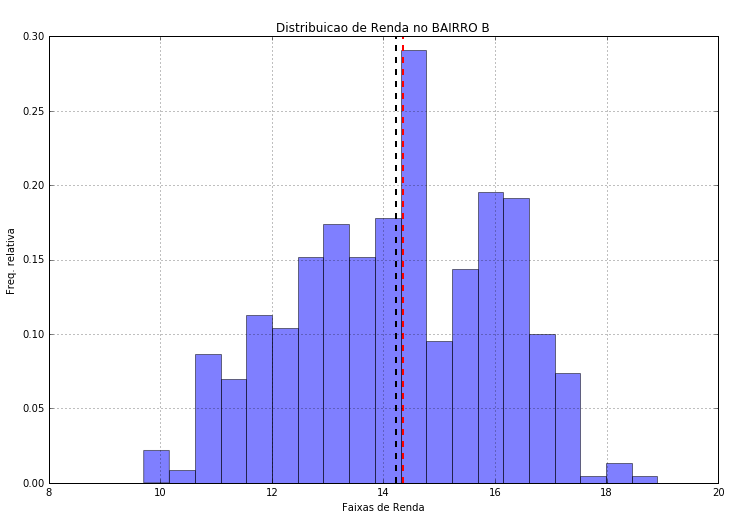

Mediana: 14.35
Media: 14.22


In [35]:
print('Describe BAIRRO A: \n{0}'.format(pad.A.describe()))
print('\nDescribe BAIRRO B: \n{0}'.format(pad.B.describe()))

plt.figure(figsize=(12,8))
plt.hist(pad.A, bins=20, alpha=0.5,normed=True, color='g')
plt.axvline(pad.A.median(), linewidth=2, color='r', linestyle='dashed', label='Mediana')
plt.axvline(pad.A.mean(), linewidth=2, color='black', linestyle='dashed', label='Media')
plt.title('Distribuicao de Renda no BAIRRO A')
plt.ylabel('Freq. relativa')
plt.xlabel('Faixas de Renda')
plt.grid()
plt.show()
print('Mediana: {0}'.format(round(pad.A.median(),2)))
print('Media: {0}'.format(round(pad.A.mean(),2)))

plt.figure(figsize=(12,8))
plt.hist(pad.B, bins=20, alpha=0.5, label="Bairro B", normed=True, color='b')
plt.axvline(pad.B.median(), linewidth=2, color='r', linestyle='dashed', label='Mediana')
plt.axvline(pad.B.mean(), linewidth=2, color='black', linestyle='dashed', label='Media')
plt.title('\nDistribuicao de Renda no BAIRRO B')
plt.ylabel('Freq. relativa')
plt.xlabel('Faixas de Renda')
plt.grid()
plt.show()
print('Mediana: {0}'.format(round(pad.B.median(),2)))
print('Media: {0}'.format(round(pad.B.mean(),2)))

O melhor bairro para se investir na padaria é o Bairro A, pois em A além de uma média de renda maior, maior parte da população do bairro tem uma renda alta, já que a mediana do Bairro A é quase 1 mil reais mais alta que a mediana do bairro B.

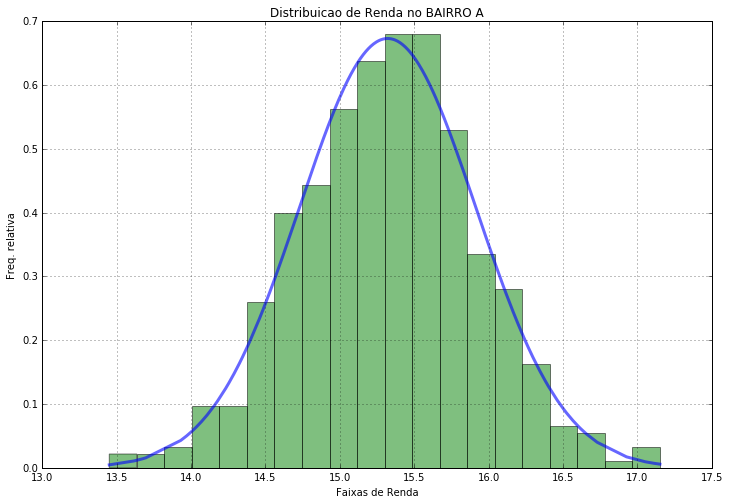

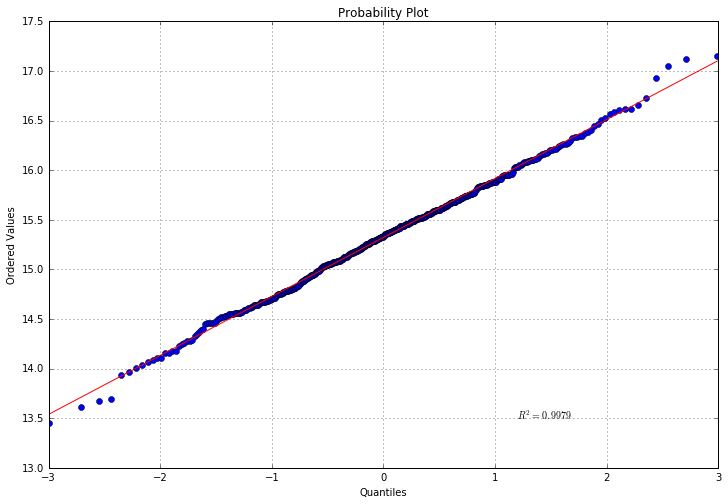

In [45]:
mu = pad.A.mean()
sigma= pad.A.std()
x = sorted(pad.A)

plt.figure(figsize=(12,8))
plt.hist(pad.A, bins=20, alpha=0.5,normed=True, color='g')
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6)
plt.title('Distribuicao de Renda no BAIRRO A')
plt.ylabel('Freq. relativa')
plt.xlabel('Faixas de Renda')
plt.grid()
plt.show()
 
plt.figure(figsize=(12,8))
stats.probplot(pad.A, dist="norm", plot=pylab)
plt.grid()
pylab.show()

Probabilidade de uma familia do bairro A ter uma renda maior que 17 mil reais.

In [48]:
prob = stats.norm.cdf(17.0, loc=mu, scale=sigma)
print('Probabilidade: {0}'.format(round((1-prob),5)))

Probabilidade: 0.0


In [52]:
prob_0_15 = stats.norm.cdf(15.0, loc=mu, scale=sigma)
prob_0_16 = stats.norm.cdf(16.0, loc=mu, scale=sigma)
print('Probabilidade: {0}'.format(round((prob_0_16 - prob_0_15),3)))

Probabilidade: 0.58


In [57]:
prob_mais5 = stats.norm.ppf(.95, loc=mu, scale=sigma)
print('Renda Bairro A: {0}'.format(round(prob_mais5,3)))

mu2 = pad.B.mean()
sigma2 = pad.B.std()

prob_mais5B = stats.norm.ppf(.95, loc=mu2, scale=sigma2)
print('Renda Bairro B: {0}'.format(round(prob_mais5B,3)))

Renda Bairro A: 16.296
Renda Bairro B: 17.249
